# Web Scraping Using LinkedIn Jobs

Scraping the data from linkedin for the role of data science and related job titles, job locations and company names

In [24]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
## Getting the URL to scrap the data from linkedin 
url = 'https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=Worldwide'

In [26]:
request = requests.get(url)
request.content
print(request)

<Response [200]>


In [27]:
soup = bs(request.content,'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta content="d_jobs_guest_search" name="pageKey"/>\n  <!-- -->\n  <meta content="urlType=jserp_custom;emptyResult=false" name="linkedin:pageTag"/>\n  <meta content="en_US" name="locale"/>\n  <meta data-app-version="2.0.1974" data-browser-id="eef14d58-b694-4c64-8d27-4b3c53e8f16a" data-call-tree-id="AAYh2VnKo7GILFLcZHV1HQ==" data-dfp-member-lix-treatment="control" data-disable-jsbeacon-pagekey-suffix="false" data-dna-member-lix-treatment="control" data-enable-page-view-heartbeat-tracking="" data-human-member-lix-treatment="control" data-member-id="0" data-multiproduct-name="jobs-guest-frontend" data-page-instance="urn:li:page:d_jobs_guest_search;fAsc4eYrQ4evDHnEq2OjEQ==" data-service-name="jobs-guest-frontend" id="config"/>\n  <link href="https://www.linkedin.com/jobs/data-scientist-jobs-worldwide" rel="canonical"/>\n  <!-- -->\n  <!-- -->\n  <!-- -->\n  <!-- -->\n  <!-- -->\n  <!-- -->\n  <link href="https://static.licdn.com/aero-v1/sc/h/

In [28]:
job_titles = []
company_name = []
job_location = []

In [29]:
title = soup.find_all('h3',class_='base-search-card__title')  
company = soup.find_all('h4',class_ = 'base-search-card__subtitle')
location = soup.find_all('span',class_ = 'job-search-card__location')

In [30]:
for tit in title:
    job_titles.append(tit.text.strip())

In [31]:
for c_nm in company:
    company_name.append(c_nm.text.strip())

In [32]:
for j_loc in location:
    job_location.append(j_loc.text.strip())

In [33]:
df = pd.DataFrame({'Job Title':job_titles,
               'Company Name':company_name,
               'Location':job_location,
               })
   

In [34]:
df.head()

,Job Title,Company Name,Location
0,"Data Scientist, Product Analytics",Etsy,"Brooklyn, NY"
1,Machine Learning Engineer,Causaly,"London, England, United Kingdom"
2,Data Scientist Jr,"Bluetab América, an IBM Company","Mexico City, Mexico"
3,Data Scientist,Twitch,United States
4,Data Scientist,Nike,"Beaverton, OR"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     59 non-null     object
 1   Company Name  59 non-null     object
 2   Location      59 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [37]:
df.to_csv(r"D:/_review.csv",index=False,header=True)

## WordCloud


In [38]:

job_c_name_text = ' '.join(df['Company Name'].dropna().tolist())

wordcloud_c_name = WordCloud(width = 800, height = 400, background_color='white').generate(job_c_name_text)


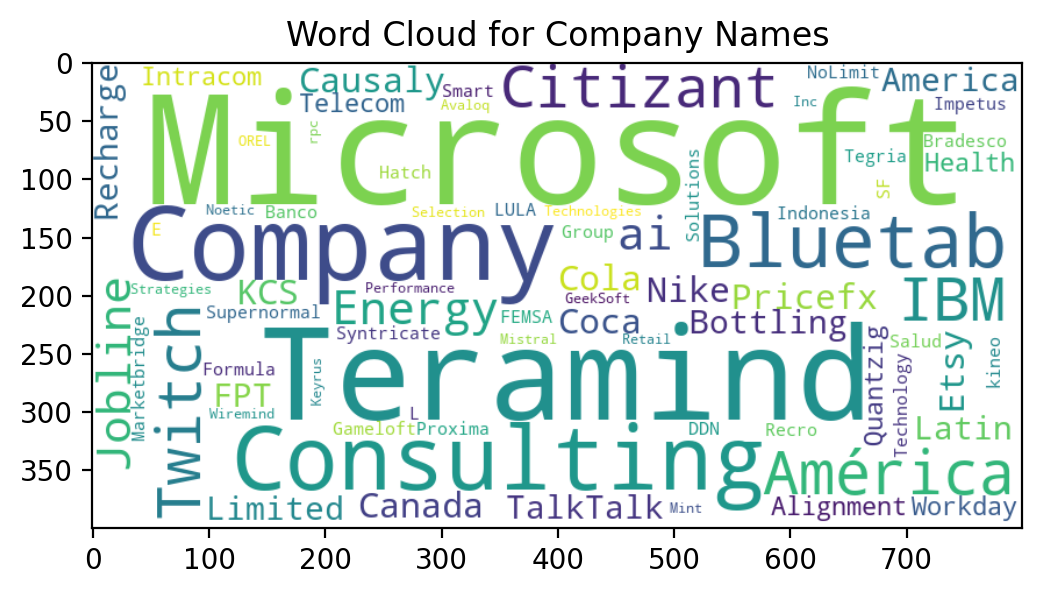

In [47]:
plt.figure(dpi = 200 )
plt.imshow(wordcloud_c_name,interpolation='bilinear')
#plt.axis('off')
plt.title("Word Cloud for Company Names")
plt.show()

In [40]:

job_loc_text = ' '.join(df['Location'].dropna().tolist())

wordcloud_loc = WordCloud(width = 800, height = 400, background_color='white').generate(job_loc_text)

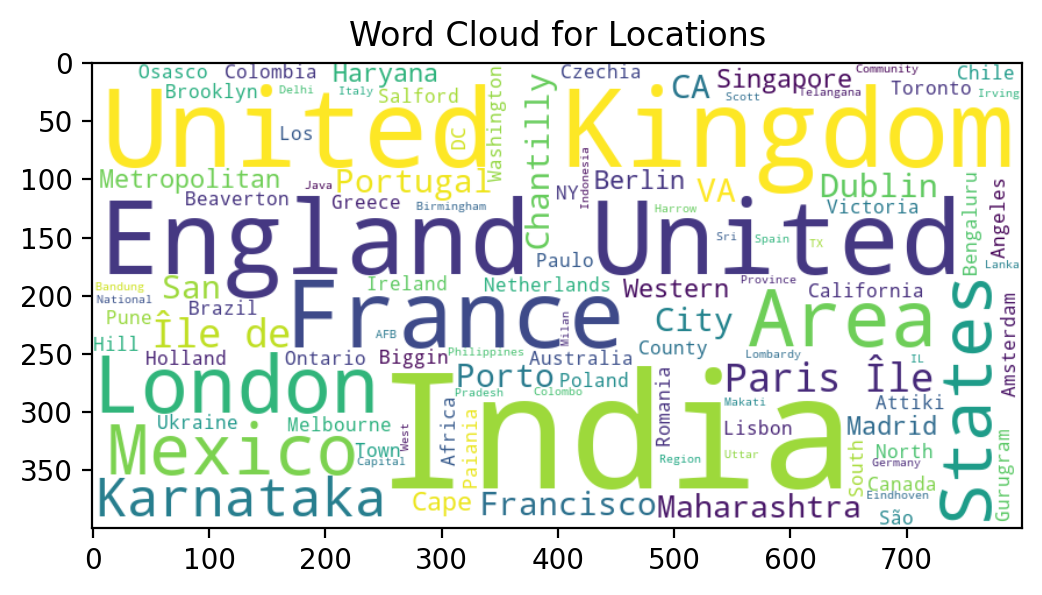

In [46]:
plt.figure(dpi = 200 )
plt.imshow(wordcloud_loc,interpolation='bilinear')
#plt.axis('off')
plt.title("Word Cloud for Locations")
plt.show()

## Visualization 

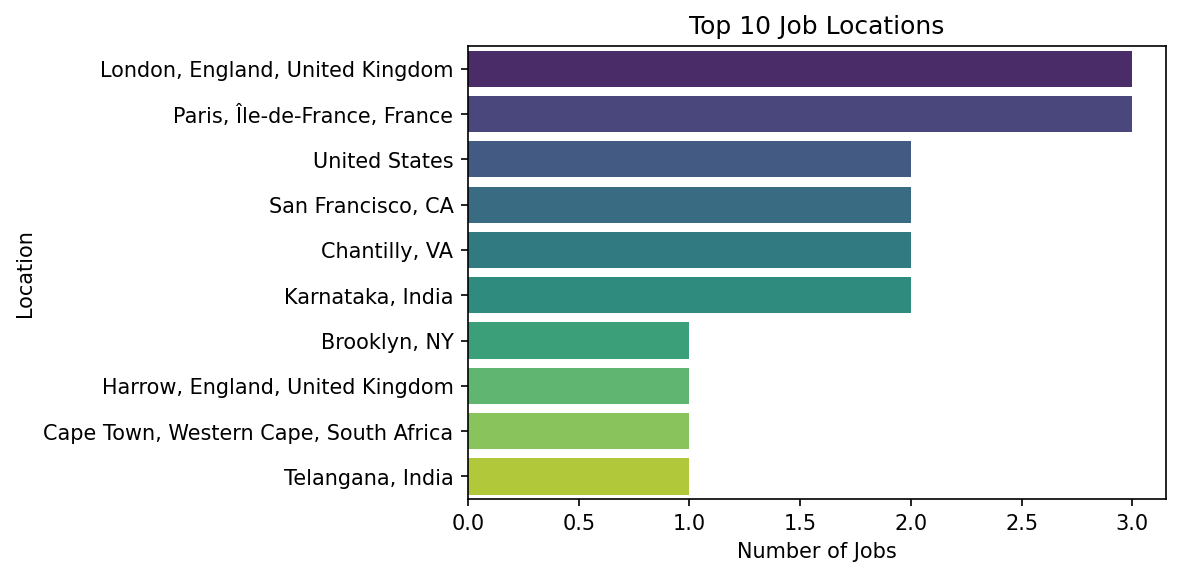

In [44]:
# 4. Bar Plot for Top 10 Job Locations
plt.figure(dpi = 150)
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index[:10], palette="viridis")
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()


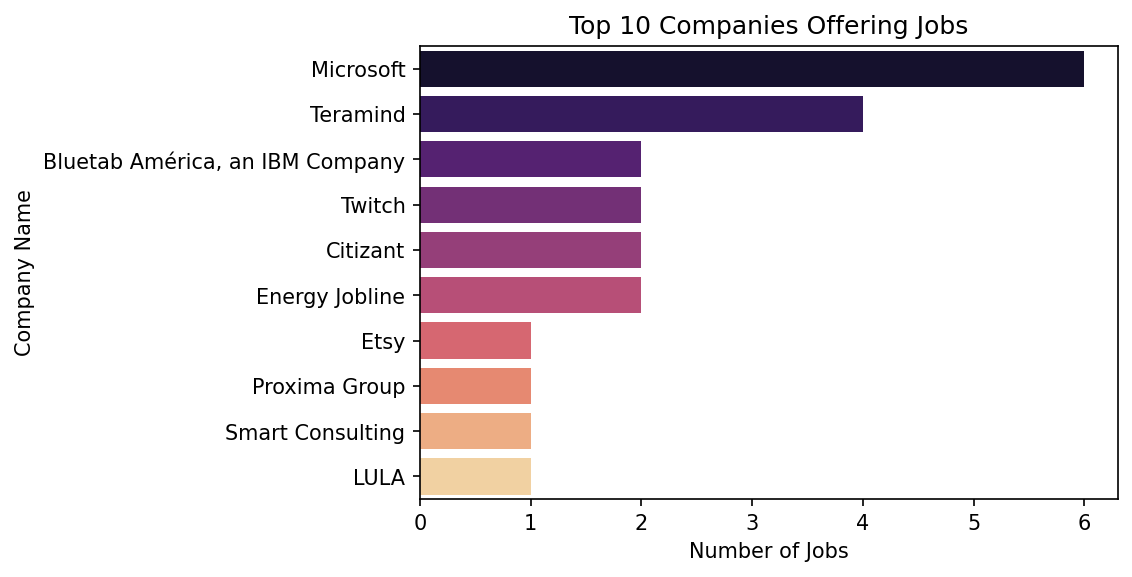

In [45]:
# 5. Bar Plot for Top 10 Company Names
plt.figure(dpi = 150)
sns.countplot(y=df['Company Name'], order=df['Company Name'].value_counts().index[:10], palette="magma")
plt.title('Top 10 Companies Offering Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
plt.show()
